# Manipulating Time Series Data in Python

> Updating ...

> You'll learn the basics of manipulating time series data. Time series data are data that are indexed by a sequence of dates or times. 

- toc: true
- branch: master
- badges: true
- comments: true
- author: Datacamp
- categories: [Pandas, Data Visualization, EDA, Time Series, Stock price, scikit-learn, Correlation,  Value-weighte, Index]
- image: images/manipulatingtimeseries.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

> You'll learn how to use methods built into Pandas to work with this index. You'll also learn how resample time series to change the frequency. This course will also show you how to calculate rolling and cumulative values for times series. Finally, you'll use all your new skills to build a value-weighted stock index from actual stock data.

PREREQUISITES: Data Manipulation with pandas

In [6]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 125

pd.set_option('display.expand_frame_repr', False)

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Working with Time Series in Pandas

> This chapter lays the foundations to leverage the powerful time series functionality made available by how Pandas represents dates, in particular by the DateTimeIndex. You will learn how to create and manipulate date information and time series, and how to do calculations with time-aware DataFrames to shift your data in time or create period-specific returns.

### How to use dates & times with pandas

> **Your first time series**

You have learned in the video how to create a sequence of dates using ```pd.date_range()```. You have also seen that each date in the resulting pd.DatetimeIndex is a pd.Timestamp with various attributes that you can access to obtain information about the date.

Now, you'll create a week of data, iterate over the result, and obtain the dayofweek and ```day_name()``` for each date.


Instructions:<br>
- Use ```pd.date_range``` to create seven dates starting from ```'2017-1-1'``` at (default) daily frequency. Use the arguments start and periods. Assign the result to seven_days.

- Iterate over each date in seven_days and in each iteration, print the .dayofweek and .day_name() attributes.


In [7]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())


6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday



### Indexing & resampling time series

> **Create a time series of air quality data**

You have seen in the video how to deal with dates that are not in the correct format, but instead are provided as string types, represented as dtype object in pandas.

We have prepared a data set with air quality data (ozone, pm25, and carbon monoxide for NYC, 2000-2017) for you to practice the use of pd.to_datetime().

Instructions:

- We have already imported pandas as pd and matplotlib.pyplot as plt for you, and loaded the air quality DataFrame into the variable data.
- Inspect data using .info().
- Use pd.to_datetime to convert the column 'date' to dtype datetime64.
- Set the 'date' column as index.
- Validate the changes by inspecting data using .info() again.
- Plot data using subplots=True.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB


None

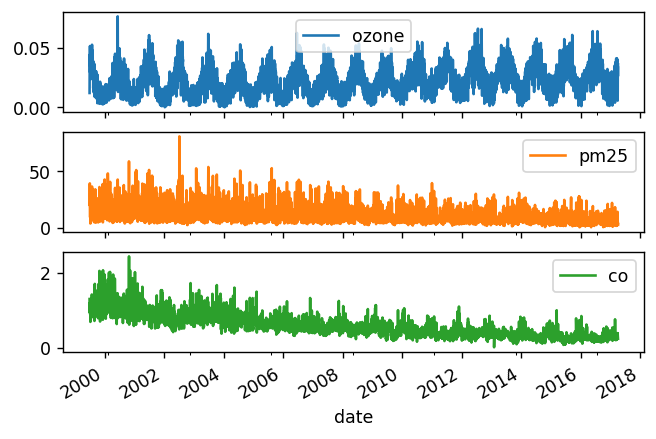

In [8]:
data = pd.read_csv('./datasets/nyc.csv')

# Inspect data
display(data.info())

# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index("date",inplace = True)

# Inspect data 
display(data.info())

# Plot data
data.plot(subplots = True)
# plt.tight_layout()
plt.show()


> **Compare annual stock price trends**

You have seen how to select sub-periods from a time series. You'll use this to compare the performance for three years of Yahoo stock prices.

Instructions:
- We have already imported pandas as pd and matplotlib.pyplot as plt and we have already loaded the 'yahoo.csv' file in a variable yahoo with DateTimeIndex and a single column price.
- Create an empty pd.DataFrame() called prices.
- Iterate over a list containing the three years, 2013, 2014, and 2015, as string, and in each loop:
    - Use the iteration variable to select the data for this year and the column price.
    - Use .reset_index() with drop=True to remove the DatetimeIndex.
    - Rename the column price column to the appropriate year.
    - Use pd.concat() to combine the yearly data with the data in prices along axis=1.
- Plot prices.


In [9]:
yahoo = pd.read_csv("./datasets/yahoo.csv")

# Convert the date column to datetime64
yahoo['date']= pd.to_datetime(yahoo['date'])
# Set date column as index
yahoo.set_index('date',inplace = True)

display(yahoo.head())

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


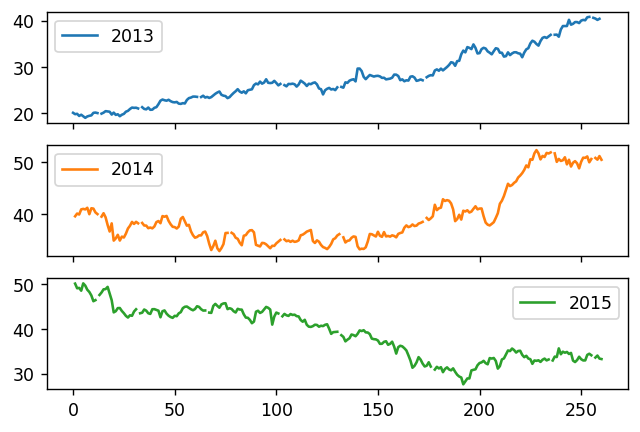

In [10]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in [ '2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot(subplots = True)
plt.show()

 The plot you just created shows Yahoo's stock price in three different years.


> **Set and change time series frequency**


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


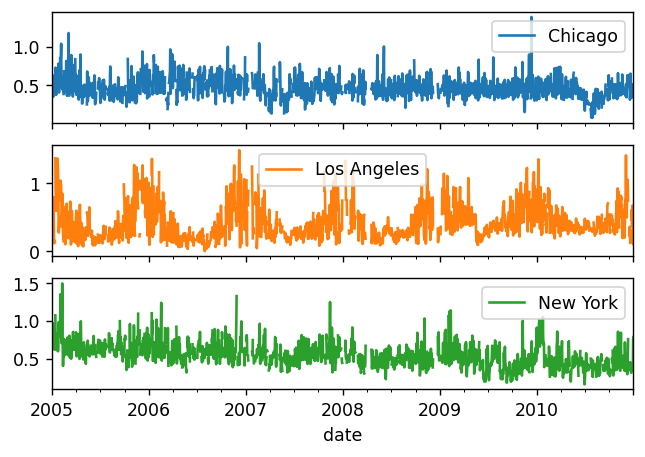

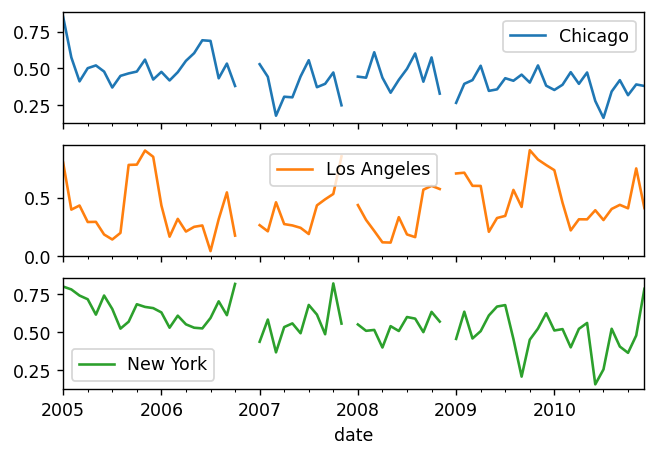

In [11]:
co = pd.read_csv('./datasets/co_cities.csv', parse_dates=['date'], index_col='date')
# Inspect data
print(co.info())
co.head()

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True)
plt.show()


# # Set frequency to monthly
co = co.asfreq('M')
# Plot the data
co.plot(subplots=True)
plt.show()




### Lags, changes, and returns for stock price series

> **Shifting stock prices across time**


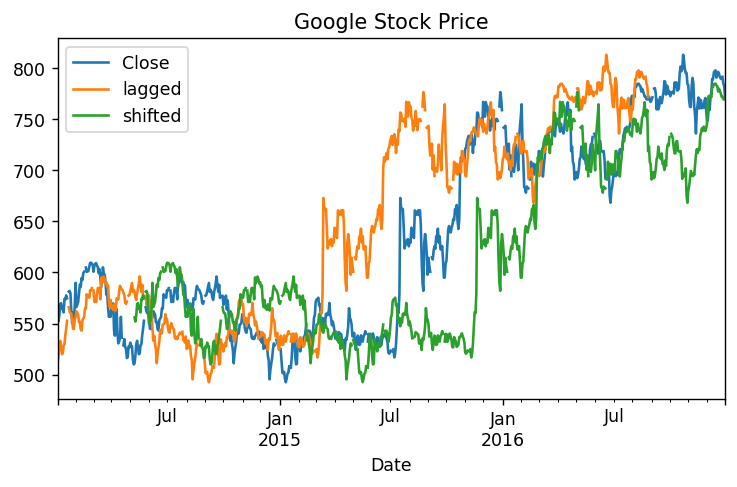

In [12]:
# Import data here
google = pd.read_csv('./datasets/google.csv', parse_dates=['Date'], index_col='Date')
# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(-90)
google['shifted'] = google.Close.shift(90)

# Plot the google price series

google.plot(title='Google Stock Price')
plt.tight_layout()
plt.show()

> **Calculating stock price changes**

You have learned in the video how to calculate returns using current and shifted prices as input. Now you'll practice a similar calculation to calculate absolute changes from current and shifted prices, and compare the result to the function .diff().

We have already imported pandas as pd and matplotlib.pyplot as plt. We have also loaded Yahoo stock prices for the years 2013 to 2015, set the frequency to business daily, and assigned the result to yahoo.

Instructions:
- Create a new column called shifted_30 that contains the 'price' shifted by 30 business days into the future.
- Subtract 'shifted_30' from 'price', and assign the result to a new column, 'change_30'.
- Apply .diff(), setting periods to 30, and assign the result to a new column, 'diff_30'.
- Inspect the last five rows of yahoo to verify the calculation.
- Subtract diff_30 from change_30 using the .sub() method and print the .value_counts() of the result to show both columns are equal.

In [13]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo['price'] - yahoo['shifted_30']

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods=30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())


            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


There's usually more than one way to get to the same result when working with data.

> **Plotting multi-period returns**

The last time series method you have learned about in the video was .pct_change(). Let's use this function to calculate returns for various calendar day periods, and plot the result to compare the different patterns.

We'll be using Google stock prices from 2014-2016. We have already imported pandas as pd, and matplotlib.pyplot as plt. We have also loaded 'GOOG' stock prices for the years 2014-2016, set the frequency to calendar daily, and assigned the result to google.

Instructions:
- Create the columns 'daily_return', 'monthly_return', and 'annual_return' that contain the pct_change() of 'Close' for 1, 30 and 360 calendar days, respectively, and multiply each by 100.
- Plot the result using subplots=True.

In [23]:
google = pd.read_csv('./datasets/google.csv', parse_dates=['Date'], index_col='Date')
# Set data frequency to business daily
google = google.asfreq('B')


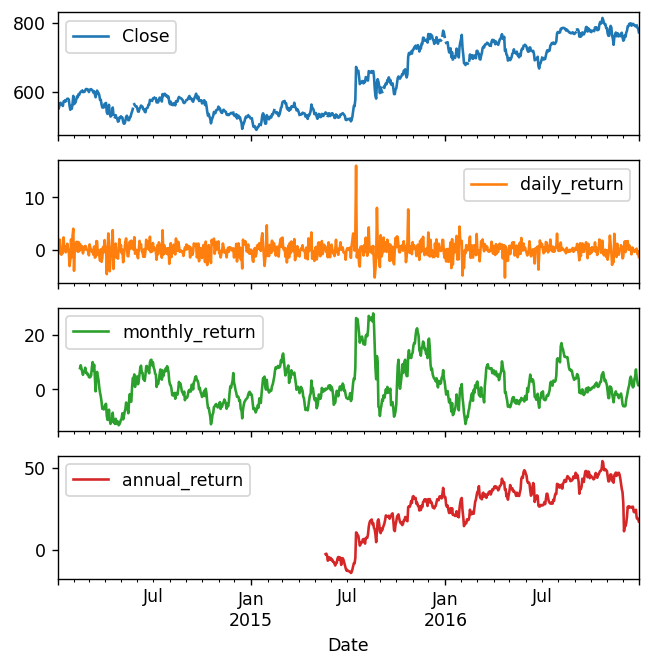

In [32]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(periods=1).mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(periods=30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(periods=360).mul(100)

# Plot the result
google.plot(subplots = True)
plt.rcParams["figure.figsize"] = (9,6)
plt.show()



## Basic Time Series Metrics & Resampling

> This chapter dives deeper into the essential time series functionality made available through the pandas DataTimeIndex. It introduces resampling and how to compare different time series by normalizing their start points.

### Compare time series growth rates

Comparing stock performance:
- Stock price series: hard to compare at di(erent levels
- Simple solution: normalize price series to start at 100
- Divide all prices by ,rst in series, multiply by 100
    - Same starting point
    - All prices relative to starting point
    - Difference to starting point in percentage points


> **Normalizing a single series**



In [44]:
google = pd.read_csv('./datasets/apple_google.csv', usecols = ['Date','GOOG'], parse_dates=['Date'], index_col='Date')
google.rename({'GOOG':'price'},axis = 1, inplace = True)
display(google.head(3))

,price
Date,
2010-01-04,313.06
2010-01-05,311.68
2010-01-06,303.83


In [45]:
first_price = google.price.iloc[0] # int-based selection
first_price

313.06

In [46]:
first_price == google.loc['2010-01-04', 'price']

True

<AxesSubplot:title={'center':'Google Normalized Series'}, xlabel='Date'>

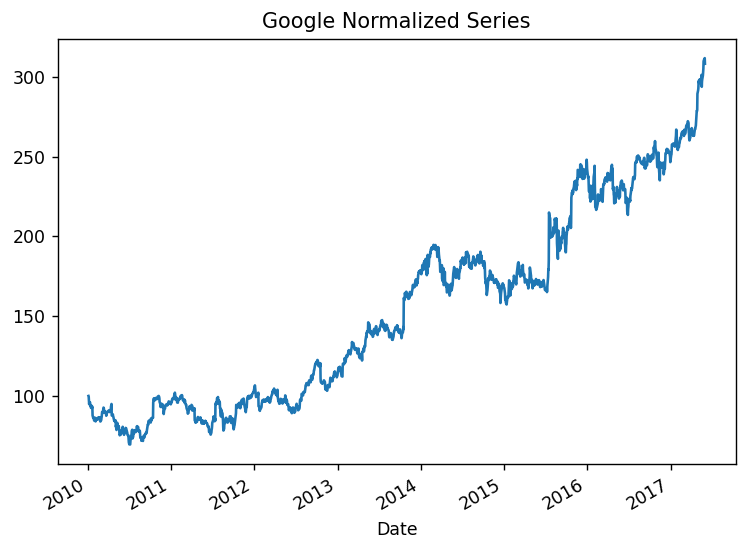

In [55]:
normalized = google.price.div(first_price).mul(100)
plt.rcParams["figure.figsize"] = (7,5)
normalized.plot(title='Google Normalized Series')

In [63]:
index = pd.read_csv('./datasets/sp500.csv',parse_dates=['date'],index_col='date')
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2395 entries, 2007-06-29 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2395 non-null   float64
dtypes: float64(1)
memory usage: 37.4 KB



> **Compare the performance of several asset classes**

You have seen in the video how you can easily compare several time series by normalizing their starting points to 100, and plot the result.

To broaden your perspective on financial markets, let's compare four key assets: stocks, bonds, gold, and oil.
We have already imported pandas as pd and matplotlib.pyplot as plt.

Instructions:
- Import 'asset_classes.csv', using .read_csv() to parse dates in the 'DATE' column and set this column as the index, then assign the result to prices.
- Select the first price for each series using .iloc[0] on prices and assign the result to first_prices.
- Divide prices by first_prices, multiply by 100 and assign the result to normalized.
- Plot normalized.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
 1   Bonds   2469 non-null   float64
 2   Gold    2469 non-null   float64
 3   Oil     2469 non-null   float64
dtypes: float64(4)
memory usage: 96.4 KB
None


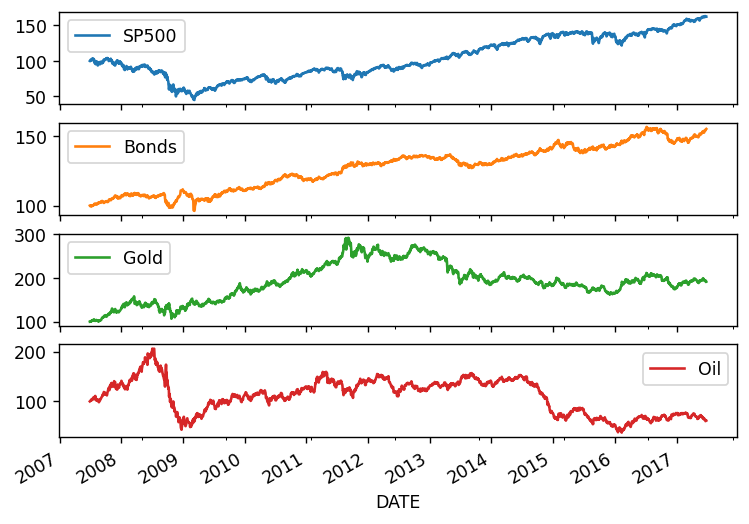

In [74]:
# Import data here
prices = pd.read_csv('./datasets/asset_classes.csv', parse_dates = ['DATE'], index_col = 'DATE')

# Inspect prices here
print(prices.info())

# Select first prices
first_prices = prices.iloc[0]

# Create normalized
normalized = prices.div(first_prices).mul(100)

# Plot normalized
normalized.plot(subplots = True)
plt.show()

Normalizing series is a common step in time series analysis.

> **Comparing stock prices with a benchmark**

You also learned in the video how to compare the performance of various stocks against a benchmark. Now you'll learn more about the stock market by comparing the three largest stocks on the NYSE to the Dow Jones Industrial Average, which contains the 30 largest US companies.

The three largest companies on the NYSE are:
| Company           | Stock Ticker |
|-------------------|--------------|
| Johnson & Johnson | JNJ          |
| Exxon Mobil       | XOM          |
| JP Morgan Chase   | JPM          |

Instructions:
- Use pd.read_csv() to import 'nyse.csv' and 'dow_jones.csv', creating a DatetimeIndex for each from the 'date' column using parse_dates and index_col, and assign the result to stocks and dow_jones, respectively.
- Use pd.concat() along axis=1 to combine stocks and dow_jones and assign the result to data. Inspect the .info() of data.
- Divide data by the first value for each series, multiply by 100 and plot the result.


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   JNJ     1762 non-null   float64
 1   JPM     1762 non-null   float64
 2   XOM     1762 non-null   float64
 3   DJIA    1762 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB
None


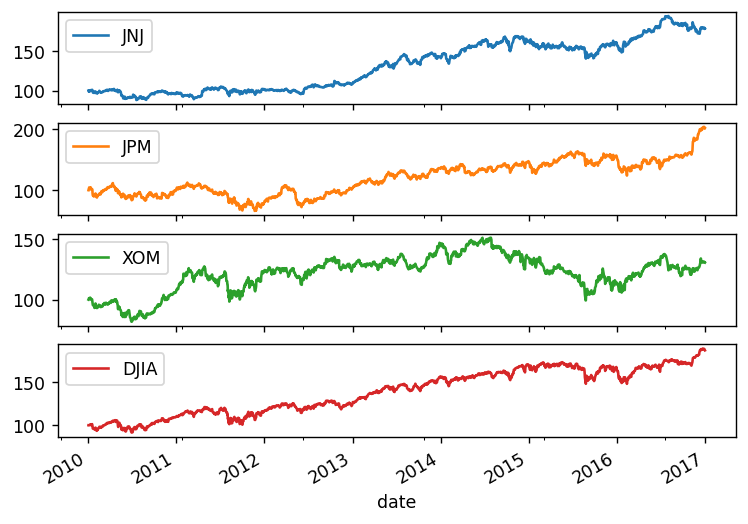

In [75]:
# Import stock prices and index here
stocks      = pd.read_csv('./datasets/nyse.csv', parse_dates = ['date'], index_col = 'date')
dow_jones   = pd.read_csv('./datasets/dow_jones.csv', parse_dates = ['date'], index_col = 'date')

# Concatenate data and inspect result here
data = pd.concat([stocks, dow_jones], axis = 1).dropna()
print(data.info())

# Normalize and plot your data here
data.div(data.iloc[0]).mul(100).plot(subplots = True)
plt.show()

> **Plot performance difference vs benchmark index**


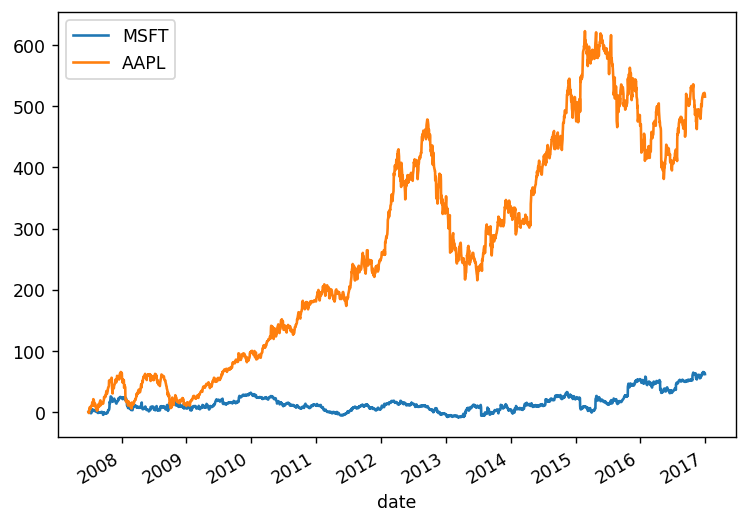

In [76]:
# Create tickers
tickers = ['MSFT','AAPL']

# Import stock data here
stocks = pd.read_csv('./datasets/msft_aapl.csv', parse_dates = ['date'], index_col = 'date')

# Import index here
sp500 = pd.read_csv('./datasets/sp500.csv', parse_dates = ['date'], index_col = 'date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis = 1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis = 0).plot()
plt.show()

Now you can compare these stocks to the overall market so you can more easily spot trends and outliers.


### Changing the time series frequency: resampling

- DateTimeIndex : set & change freq using .asfreq()
- But frequency conversion a(ects the data
    - Upsampling: ,ll or interpolate missing data
    - Downsampling: aggregate existing data
- pandas API:
    - .asfreq() , .reindex()
    - .resample() + transformation method


> **Getting started: quarterly data**


In [82]:
dates = pd.date_range(start='2016', periods=4, freq='Q')
data = range(1, 5)
quarterly = pd.Series(data=data, index=dates)
quarterly

2016-03-31    1
2016-06-30    2
2016-09-30    3
2016-12-31    4
Freq: Q-DEC, dtype: int64

**Upsampling: quarter => month**

Upsampling creates missing values

In [83]:
monthly = quarterly.asfreq('M') # to month-end frequency
monthly

2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

**Upsampling: fill methods**

- bfill : backfill
- ffill : forward fill
- fill_value=0

In [84]:
monthly = monthly.to_frame('baseline') # to DataFrame
monthly['ffill'] = quarterly.asfreq('M', method='ffill')
monthly['bfill'] = quarterly.asfreq('M', method='bfill')
monthly['value'] = quarterly.asfreq('M', fill_value=0)

monthly

,baseline,ffill,bfill,value
2016-03-31,1.0,1,1,1
2016-04-30,NaN,1,2,0
2016-05-31,NaN,1,2,0
2016-06-30,2.0,2,2,2
2016-07-31,NaN,2,3,0
2016-08-31,NaN,2,3,0
2016-09-30,3.0,3,3,3
2016-10-31,NaN,3,4,0
2016-11-30,NaN,3,4,0
2016-12-31,4.0,4,4,4


**Add missing months: .reindex()**

```.reindex()``` :
- conform DataFrame to new index
- same filling logic as ```.asfreq()```

In [86]:
dates = pd.date_range(start='2016', periods=12, freq='M')
dates

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

In [88]:
quarterly.reindex(dates)

2016-01-31    NaN
2016-02-29    NaN
2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64


> **Convert monthly to weekly data**

You have learned in the video how to use .reindex() to conform an existing time series to a DateTimeIndex at a different frequency.

Let's practice this method by creating monthly data and then converting this data to weekly frequency while applying various fill logic options.

Instructions:
- Create monthly_dates using pd.date_range with start, end and frequency alias 'M'.
- Create and print the pd.Series monthly, passing the list [1, 2] as the data argument, and using monthly_dates as index.
- Create weekly_dates using pd.date_range with start, end and frequency alias 'W'.
- Apply .reindex() to monthly three times: first without additional options, then with bfill and then with ffill, print()-ing each result.

In [89]:
# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start = start,end = end, freq='M')

# Create and print monthly here
monthly = pd.Series(data=[1,2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start = start,end = end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates,method='bfill'))
print(monthly.reindex(weekly_dates,method='ffill'))


2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


> **Create weekly from monthly unemployment data**

The civilian US unemployment rate is reported monthly. You may need more frequent data, but that's no problem because you just learned how to upsample a time series.

You'll work with the time series data for the last 20 years, and apply a few options to fill in missing values before plotting the weekly series.

Instructions:
- Use pd.read_csv() to import 'unemployment.csv', creating a DateTimeIndex from the 'date' column using parse_dates and index_col, and assign the result to data.
- Convert data to weekly frequency using .asfreq() with the alias 'W' and show the first five rows.
- Convert again to weekly frequency, adding the option 'bfill' and show the first five rows.
- Create weekly series, now adding the option 'ffill', assign to weekly_ffill and show the first five rows.
- Plot weekly_ffill starting in 2015.

            UNRATE
date              
2000-01-02     NaN
2000-01-09     NaN
2000-01-16     NaN
2000-01-23     NaN
2000-01-30     NaN
            UNRATE
date              
2000-01-02     4.1
2000-01-09     4.1
2000-01-16     4.1
2000-01-23     4.1
2000-01-30     4.1
            UNRATE
date              
2000-01-02     4.0
2000-01-09     4.0
2000-01-16     4.0
2000-01-23     4.0
2000-01-30     4.0


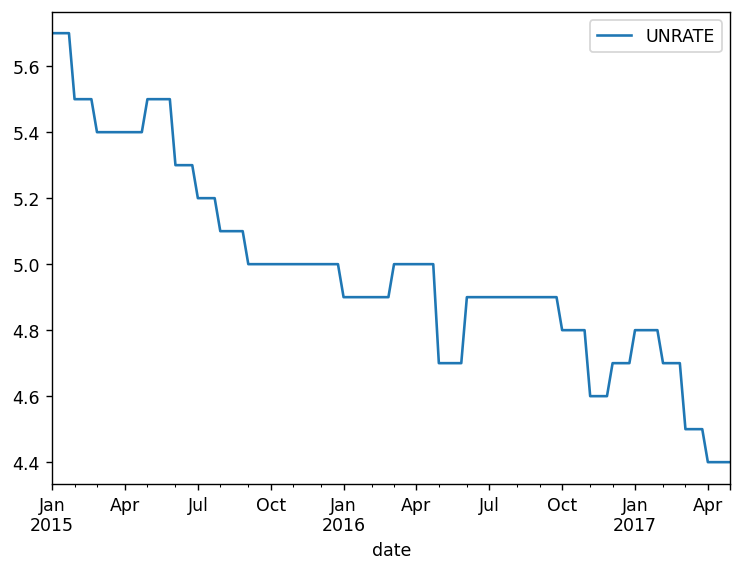

In [92]:
# Import data here
# data = pd.read_csv('unemployment.csv', parse_dates=['date'] , index_col='date'
data = pd.read_csv('./datasets/unrate_2000.csv', parse_dates=['date'] , index_col='date') 

# Show first five rows of weekly series
print(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
weekly_ffill.loc['2015':].plot()
plt.show()



### Upsampling & interpolation with .resample()

**Frequency conversion & transformation methods**

- ```.resample()``` : similar to ```.groupby()```
- Groups data within resampling period and applies one or several methods to each group
- New date determined by o(set - start, end, etc
- Upsampling: fill from existing or interpolate values
- Downsampling: apply aggregation to existing data



In [100]:
unrate = pd.read_csv('./datasets/unrate_2000.csv', parse_dates=['date'], index_col='date')
unrate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2000-01-01 to 2017-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  209 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [101]:
display(unrate.head())

,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


**Quarterly real GDP growth**

In [113]:

gdp = pd.read_csv('./datasets/gdp_growth.csv', parse_dates=['date'], index_col='date')
gdp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes


In [117]:
gdp.head(5)

,gdp_growth
date,
2007-01-01,0.2
2007-04-01,3.1
2007-07-01,2.7
2007-10-01,1.4
2008-01-01,-2.7


**Interpolate monthly real GDP growth**


In [118]:
gdp_1 = gdp.resample('MS').ffill().add_suffix('_ffill')
gdp_1.head(10)

,gdp_growth_ffill
date,
2007-01-01,0.2
2007-02-01,0.2
2007-03-01,0.2
2007-04-01,3.1
2007-05-01,3.1
2007-06-01,3.1
2007-07-01,2.7
2007-08-01,2.7
2007-09-01,2.7


**```.interpolate() ```**: find points on straight line between existing data

In [119]:
gdp_2 = gdp.resample('MS').interpolate().add_suffix('_inter')
gdp_2.head(10)

,gdp_growth_inter
date,
2007-01-01,0.200000
2007-02-01,1.166667
2007-03-01,2.133333
2007-04-01,3.100000
2007-05-01,2.966667
2007-06-01,2.833333
2007-07-01,2.700000
2007-08-01,2.266667
2007-09-01,1.833333


**Plot interpolated real GDP growth**

- **```interpolate```** vs **```ffill```**


<AxesSubplot:xlabel='date'>

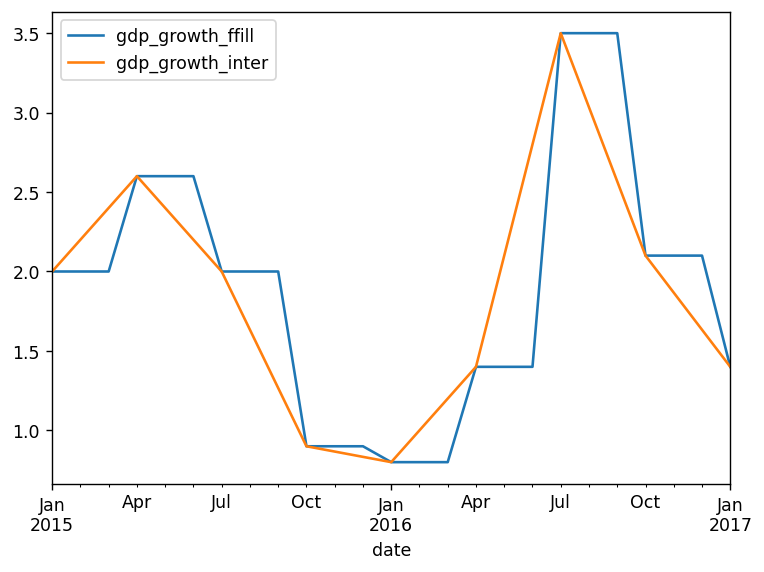

In [120]:
pd.concat([gdp_1, gdp_2], axis=1).loc['2015':].plot()

**Combine GDP growth & unemployment**

In [129]:
gdp = pd.read_csv('./datasets/gdp_growth.csv', parse_dates=['date'], index_col='date')
gdp_inter = gdp.resample('MS').interpolate().add_suffix('_inter')

In [130]:
unrate = pd.read_csv('./datasets/unrate_2000.csv', parse_dates = ['date'], index_col='date')
display(unrate.head())

,UNRATE
date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


<AxesSubplot:xlabel='date'>

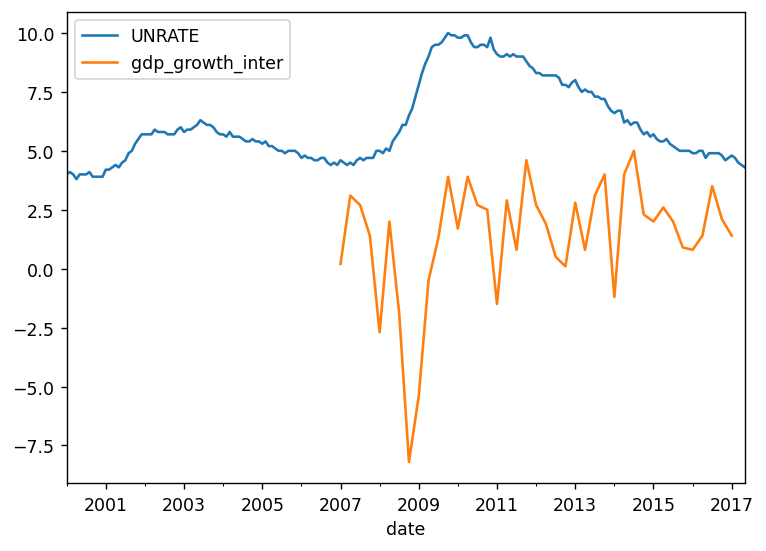

In [131]:
pd.concat([unrate, gdp_inter], axis=1).plot()

 Interpolating is a useful way to create smoother time series when resampling.

> **Use interpolation to create weekly employment data**

You have recently used the civilian US unemployment rate, and converted it from monthly to weekly frequency using simple forward or backfill methods.

Compare your previous approach to the new .interpolate() method that you learned about in this video. We have imported pandas as pd and matplotlib.pyplot as plt for you. We have also loaded the monthly unemployment rate from 2010 to 2016 into a variable monthly.

Instructions:
- Inspect monthly using .info().
- Create a pd.date_range() with weekly dates, using the .min() and .max() of the index of monthly as start and end, respectively, and assign the result to weekly_dates.
- Apply .reindex() using weekly_dates to monthly and assign the output to weekly.
- Create new columns 'ffill' and 'interpolated' by applying .ffill() and .interpolate() to weekly.UNRATE.
- Show a plot of weekly.

In [102]:
monthly = pd.read_csv('./datasets/unrate.csv', parse_dates=['DATE'], index_col='DATE')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 85 entries, 2010-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  85 non-null     float64
dtypes: float64(1)
memory usage: 3.4 KB
None


,UNRATE,ffill,interpolated
2011-01-02,NaN,9.5,9.217949
2011-01-09,NaN,9.5,9.205128
2011-01-16,NaN,9.5,9.192308
2011-01-23,NaN,9.5,9.179487
2011-01-30,NaN,9.5,9.166667


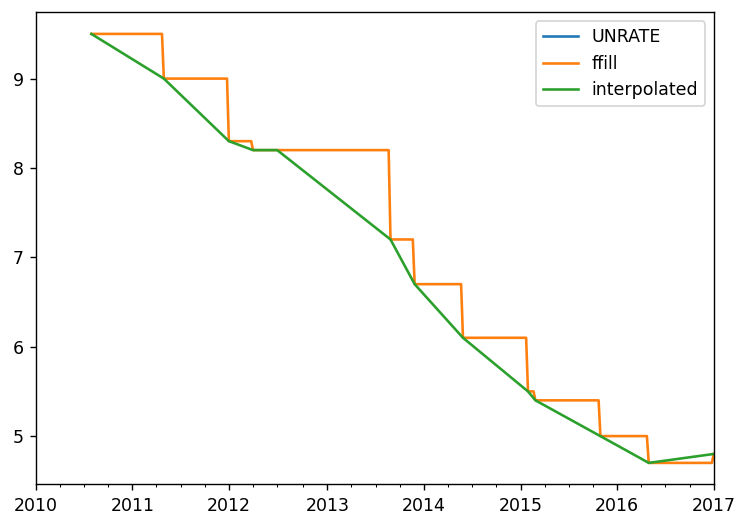

In [111]:
# Inspect data here
print(monthly.info())

# Create weekly dates
weekly_dates = pd.date_range(start = monthly.index.min() , end = monthly.index.max(), freq='W')

# Reindex monthly to weekly data
weekly = monthly.reindex(weekly_dates)

# Create ffill and interpolated columns
weekly['ffill'] = weekly.UNRATE.ffill()
weekly['interpolated'] = weekly.UNRATE.interpolate()
display(weekly.loc['2011':].head())
# Plot weekly
weekly.plot()
plt.show()

> **Interpolate debt/GDP and compare to unemployment**

Since you have learned how to interpolate time series, you can now apply this new skill to the quarterly debt/GDP series, and compare the result to the monthly unemployment rate.

Instructions:
- Use pd.read_csv() to import 'debt_unemployment.csv', creating a DateTimeIndex from the 'date' column using parse_dates and index_col, and assign the result to data. print() the .info() of the data.
- Apply .interpolate() to data and assign this to interpolated, then inspect the result.
- Plot interpolated with 'Unemployment' on the secondary_y axis.


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      29 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2010-01-01 to 2017-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Debt/GDP      89 non-null     float64
 1   Unemployment  89 non-null     float64
dtypes: float64(2)
memory usage: 2.1 KB
None


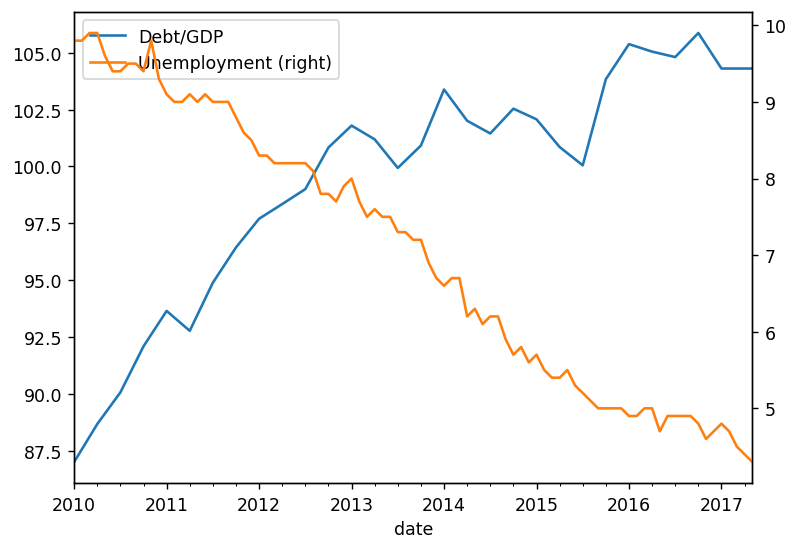

In [104]:
# Import & inspect data here
data = pd.read_csv('./datasets/debt_unemployment.csv', parse_dates = ['date'], index_col = 'date')
print(data.info())

# Interpolate and inspect here
interpolated = data.interpolate()
print(interpolated.info())

# Plot interpolated data here
interpolated.plot(secondary_y = 'Unemployment')
plt.show()

### Downsampling & aggregation

- So far: upsampling, fill logic & interpolation
- Now: downsampling
    - hour to day
    - day to month, etc
- How to represent the existing values at the new date?
    - Mean, median, last value?

**Air quality: daily ozone levels**

In [137]:
ozone = pd.read_csv('./datasets/ozone_nyc.csv', parse_dates=['date'], index_col='date')
display(ozone.head())
ozone.info()


,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


In [138]:
ozone = ozone.resample('D').asfreq()
display(ozone.head())
ozone.info()

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


**Creating monthly ozone data**

Example: 
- ```.resample().mean()``` : Monthly average, assigned to end of calendar month

In [139]:
display(ozone.resample('M').mean().head())

,Ozone
date,
2000-01-31,0.010443
2000-02-29,0.011817
2000-03-31,0.016810
2000-04-30,0.019413
2000-05-31,0.026535


- ```.resample().median()``` : Monthly median, assigned to end of calendar month

In [140]:
display(ozone.resample('M').median().head())

,Ozone
date,
2000-01-31,0.009486
2000-02-29,0.010726
2000-03-31,0.017004
2000-04-30,0.019866
2000-05-31,0.026018


- ```.resample().agg() ```: List of aggregation functions like
groupby

In [141]:
display(ozone.resample('M').agg(['mean', 'std']).head())

Ozone          
                mean       std
date                          
2000-01-31  0.010443  0.004755
2000-02-29  0.011817  0.004072
2000-03-31  0.016810  0.004977
2000-04-30  0.019413  0.006574
2000-05-31  0.026535  0.008409

**Plotting resampled ozone data**


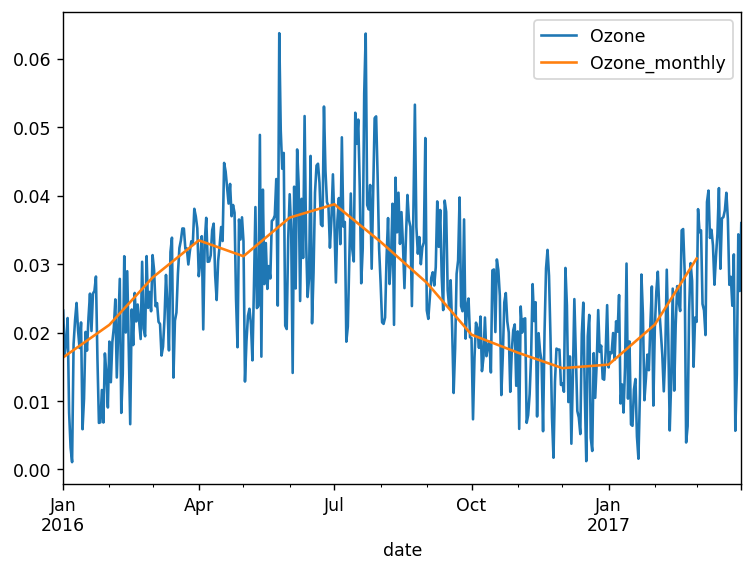

In [142]:
ozone = ozone.loc['2016':]
ax = ozone.plot()
monthly = ozone.resample('M').mean()
monthly.add_suffix('_monthly').plot(ax=ax)
plt.show()

**Resampling multiple time series**

In [146]:
data = pd.read_csv('./datasets/nyc.csv', parse_dates=['date'], index_col='date')
data = data.resample('D').asfreq()
display(data.head())
data.info()

,ozone,pm25,co
date,,,
1999-07-01,0.012024,20.000000,1.300686
1999-07-02,0.027699,23.900000,0.958194
1999-07-03,0.043969,36.700000,1.194444
1999-07-04,0.035161,39.000000,1.081548
1999-07-05,0.038359,28.171429,0.939583


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6484 entries, 1999-07-01 to 2017-03-31
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 202.6 KB


In [147]:
data = data.resample('BM').mean() # 'BM' Business Month
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 213 entries, 1999-07-30 to 2017-03-31
Freq: BM
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   213 non-null    float64
 1   pm25    213 non-null    float64
 2   co      213 non-null    float64
dtypes: float64(3)
memory usage: 6.7 KB


> **Compare weekly, monthly and annual ozone trends for NYC & LA**

You have seen in the video how to downsample and aggregate time series on air quality.

First, you'll apply this new skill to ozone data for both NYC and LA since 2000 to compare the air quality trend at weekly, monthly and annual frequencies and explore how different resampling periods impact the visualization.

Instructions:
- Use pd.read_csv() to import 'ozone.csv' and set a DateTimeIndex based on the 'date' column using parse_dates and index_col, assign the result to ozone and inspect using .info().
- Apply .resample() with weekly frequency ('W') to ozone, aggregate using .mean() and plot the result.
- Repeat with monthly ('M') and annual ('A') frequencies, plotting each result.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Los Angeles  5488 non-null   float64
 1   New York     6167 non-null   float64
dtypes: float64(2)
memory usage: 147.4 KB
None


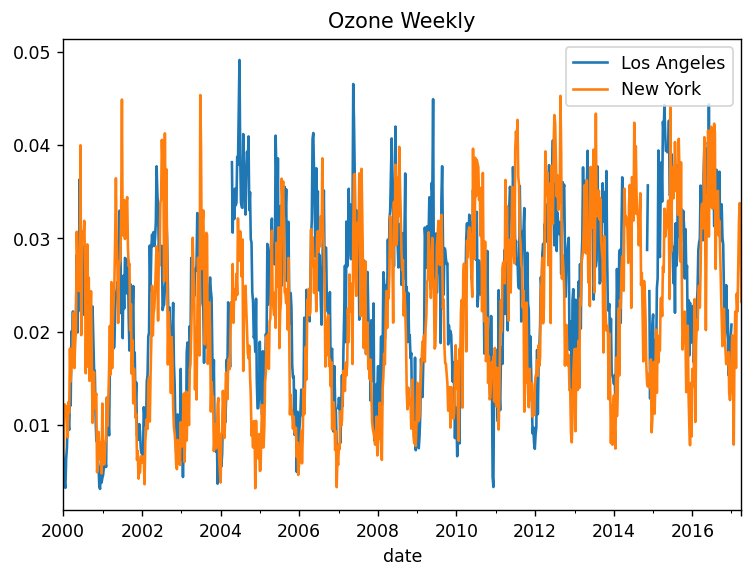

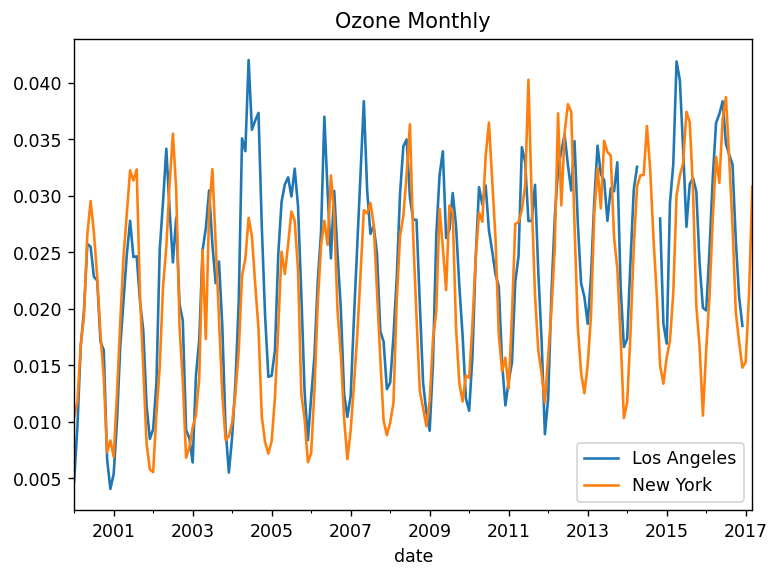

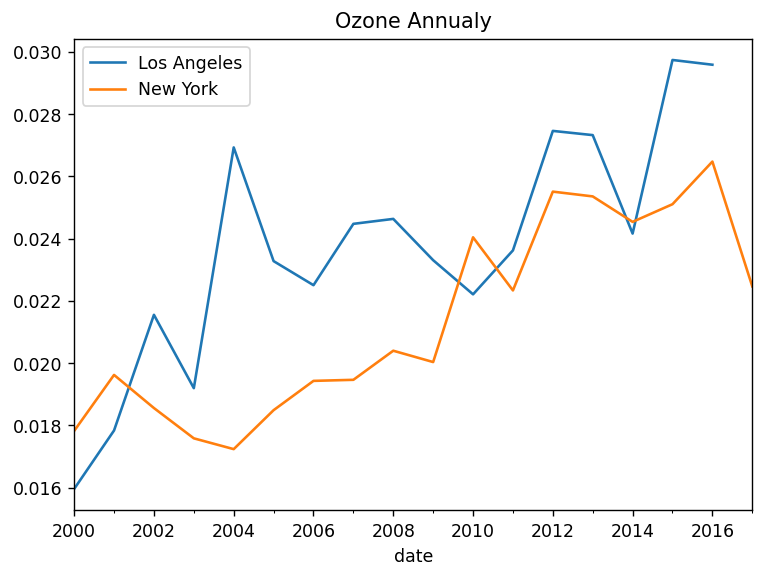

In [149]:
# Import and inspect data here
ozone = pd.read_csv('./datasets/ozone_nyla.csv', parse_dates=['date'], index_col='date')
print(ozone.info())

# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot()
plt.title('Ozone Weekly')
plt.show()

# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot()
plt.title('Ozone Monthly')
plt.show()

# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot()
plt.title('Ozone Annualy')
plt.show()

> **Compare monthly average stock prices for Facebook and Google**

Now, you'll apply your new resampling skills to daily stock price series for Facebook and Google for the 2015-2016 period to compare the trend of the monthly averages.

Instructions:
- Use pd.read_csv() to import 'stocks.csv' and set a DateTimeIndex based on the 'date' column using parse_dates and index_col, assign the result to stocks and inspect using .info().
- Create monthly_average by applying .resample() with monthly frequency to data, using .mean() to aggregate. Plot the result using subplots.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FB      504 non-null    float64
 1   GOOG    504 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB
None


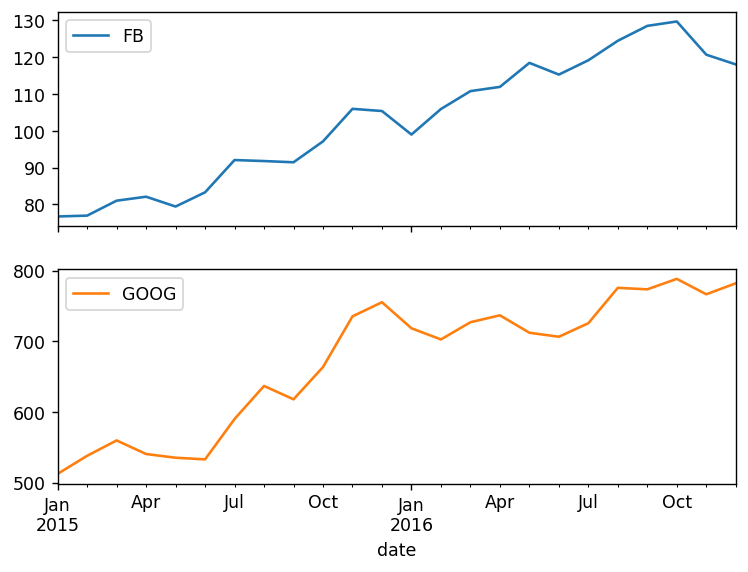

In [152]:
# Import and inspect data here
# stocks =  pd.read_csv('stocks.csv', parse_dates=['date'], index_col='date')
stocks =  pd.read_csv('./datasets/goog_fb.csv', parse_dates=['date'], index_col='date')
print(stocks.info())
 
# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True)
plt.show()

> **Compare quarterly GDP growth rate and stock returns**

With your new skill to downsample and aggregate time series, you can compare higher-frequency stock price series to lower-frequency economic time series.

As a first example, let's compare the quarterly GDP growth rate to the quarterly rate of return on the (resampled) Dow Jones Industrial index of 30 large US stocks.

GDP growth is reported at the beginning of each quarter for the previous quarter. To calculate matching stock returns, you'll resample the stock index to quarter start frequency using the alias 'QS', and aggregating using the .first() observations.

Instructions:
- Use pd.read_csv() to import 'gdp_growth.csv' and 'djia.csv', for both set a DateTimeIndex based on the 'date' column using parse_dates and index_col, and assign the results to gdp_growth and djia respectively, then inspect using .info().
- Resample djia using frequency alias 'QS', aggregate using .first(), and assign to djia_quarterly.
- Apply .pct_change() to djia_quarterly and .mul() by 100 to obtain djia_quarterly_return.
- Use pd.concat() to concatenate gdp_growth and djia_quarterly_return along axis=1, and assign to data. Rename the columns using .columns and the new labels 'gdp' and 'djia', then .plot() the results.


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gdp_growth  41 non-null     float64
dtypes: float64(1)
memory usage: 656.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   djia    2519 non-null   float64
dtypes: float64(1)
memory usage: 40.8 KB
None


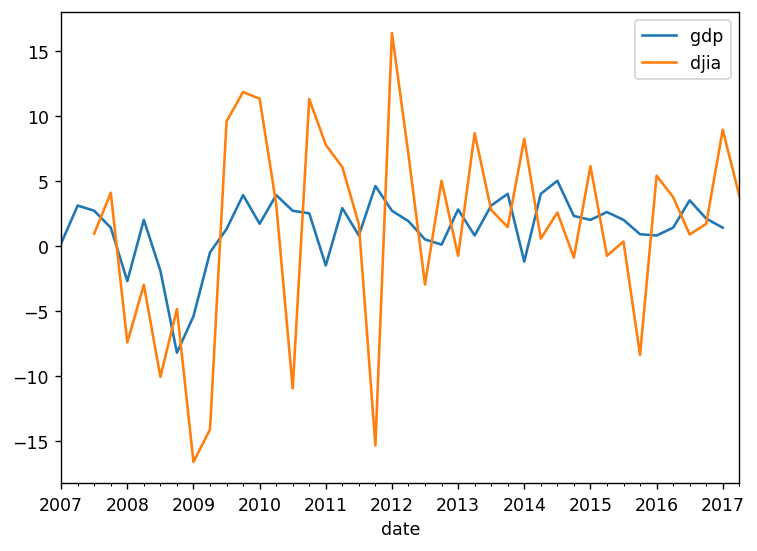

In [154]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('./datasets/gdp_growth.csv', parse_dates=['date'], index_col='date')
print(gdp_growth.info())
 
# Import and inspect djia here
djia = pd.read_csv('./datasets/djia.csv', parse_dates=['date'], index_col='date')
print(djia.info())
 
 
# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)
 
# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth, djia_quarterly_return], axis=1)
data.columns = ['gdp', 'djia']
 
data.plot()
plt.show()

> **Visualize monthly mean, median and standard deviation of S&P500 returns**

You have also learned how to calculate several aggregate statistics from upsampled data.

Let's use this to explore how the monthly mean, median and standard deviation of daily S&P500 returns have trended over the last 10 years.

Instructions:
- Use pd.read_csv() to import 'sp500.csv', set a DateTimeIndex based on the 'date' column using parse_dates and index_col, assign the results to sp500, and inspect using .info().
- Convert sp500 to a pd.Series() using .squeeze(), and apply .pct_change() to calculate daily_returns.
- .resample() daily_returns to month-end frequency (alias: 'M'), and apply .agg() to calculate 'mean', 'median', and 'std'. Assign the result to stats.
- .plot() stats.

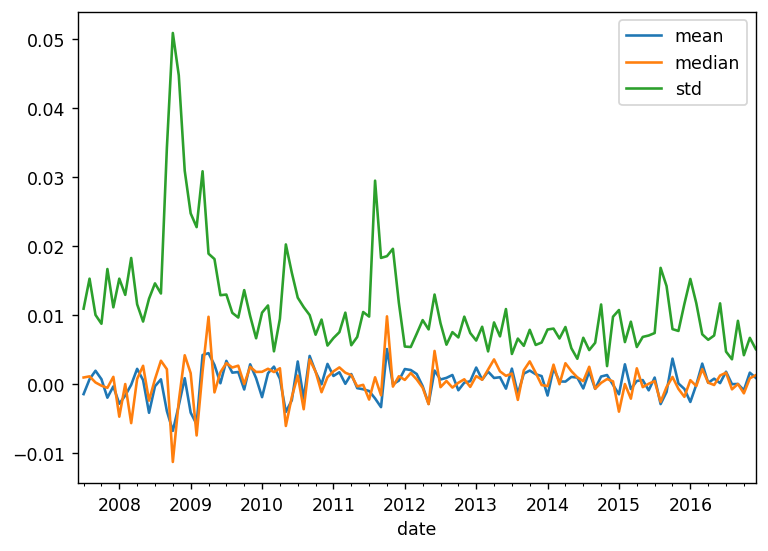

In [155]:
# Import data here
sp500 = pd.read_csv('./datasets/sp500.csv', parse_dates=['date'], index_col='date')
 
# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()
 
# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])
 
# Plot stats here
stats.plot()
plt.show()

Now you're a pro at resampling time series!


## Window Functions: Rolling & Expanding Metrics

> This chapter will show you how to use window function to calculate time series metrics for both rolling and expanding windows.

### Rolling window functions with pandas
- Rolling average air quality since 2010 for new york city
- Rolling 360-day median & std. deviation for nyc ozone data since 2000
- Rolling quantiles for daily air quality in nyc

### Expanding window functions with pandas
- Cumulative sum vs .diff()
- Cumulative return on $1,000 invested in google vs apple I
- Cumulative return on $1,000 invested in google vs apple II

### Case study: S&P500 price simulation
- Random walk I
- Random walk II
- Random walk III

### Relationships between time series: correlation
- Annual return correlations among several stocks





## Putting it all together: Building a value-weighted index

> This chapter combines the previous concepts by teaching you how to create a value-weighted index. This index uses market-cap data contained in the stock exchange listings to calculate weights and 2016 stock price information. Index performance is then compared against benchmarks to evaluate the performance of the index you created.

### Select index components & import data
- Explore and clean company listing information
- Select and inspect index components
- Import index component price information

### Build a market-cap weighted index
- Calculate number of shares outstanding
- Create time series of market value
- Calculate & plot the composite index

### Evaluate index performance
- Calculate the contribution of each stock to the index
- Compare index performance against benchmark I
- Compare index performance against benchmark II

### Index correlation & exporting to Excel
- Visualize your index constituent correlations
- Save your analysis to multiple excel worksheets
- Congratulations!

